**1. Импортируем библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**2. Сбор и обработка данных**

In [2]:
# Загрузка данных из CSV файла
df = pd.read_csv("/content/drive/MyDrive/Data/gld_price_data.csv")

In [3]:
# Просмотр первых 5 строк DataFrame
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Просмотр последних 5 строк
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Основная информация о DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# Проверка количества пропущенных значений в DataFrame
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
# Получение статистических характеристик данных
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Корреляция:
  1. Положительная
  2. Отрицательная

In [8]:
correlation = df.corr(numeric_only=True)

<Axes: >

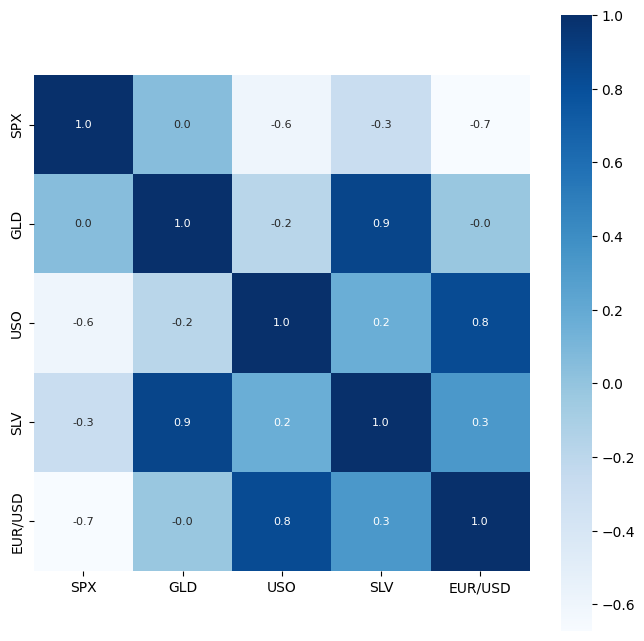

In [9]:
# Построение тепловой карты (heatmap) для анализа корреляций
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

In [10]:
# Корреляция GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-29c2299ca50b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"], color="gold")


<Axes: xlabel='GLD', ylabel='Density'>

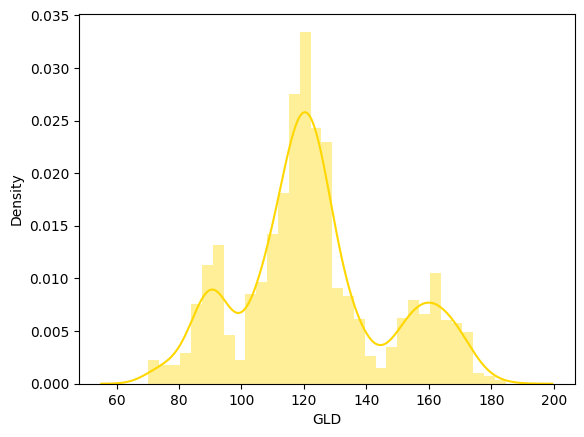

In [11]:
# Анализ распределения цены GLD
sns.distplot(df["GLD"], color="gold")

**3. Разделение данных на обучающую и тестовую выборки**

In [12]:
X = df.drop(["Date", "GLD"], axis=1)
y = df["GLD"]

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Обучение модели: Random Forest Regressor**

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
# Обучение модели
regressor.fit(X_train, y_train)

RandomForestRegressor()

**5. Оценка качества модели**

In [18]:
test_data_predict = regressor.predict(X_test)

In [19]:
print(test_data_predict)

[122.62819933 130.17130295 127.46479978  96.53969723 118.67880076
 114.49089928 124.7569014  117.70569895 107.99520097  98.36749983
  95.50349979 167.34419865 149.56980107 116.25320031 170.82650092
  84.98839965 123.25339864 109.47689712 113.07390084 131.60990303
 124.28849896 113.78390102 116.03140063 108.7762996  108.5610012
 125.95779927 119.68069957 112.60569889 113.54370108 125.45139896
 146.33820162  89.51119993 167.98429952 113.64609929 108.532201
 119.95960111 141.80489843 161.24600149 174.18089842 153.26870155
 119.12120109 113.31290074 121.45269926 113.64319911 122.01190019
 107.92370093  88.24139894 114.51009924 129.50040284 117.9836013
 104.14439972 129.67970312 107.21939823 160.22960381 131.59349997
 118.12719959 147.07110008 135.30870185  95.53490093 124.56470126
 115.12399847  86.12220085 104.3280989  114.00610074  84.1990994
 122.30560018 116.80759914 113.70040181 164.71760357  92.35180001
  80.67180095 160.91320114 159.24480269 106.33629999 150.01480184
 109.41829777 1

In [20]:
# Коэффициент детерминации (R²)
error_score = metrics.r2_score(y_test, test_data_predict)
print(error_score)

0.991086258724605


In [21]:
y_test = list(y_test)

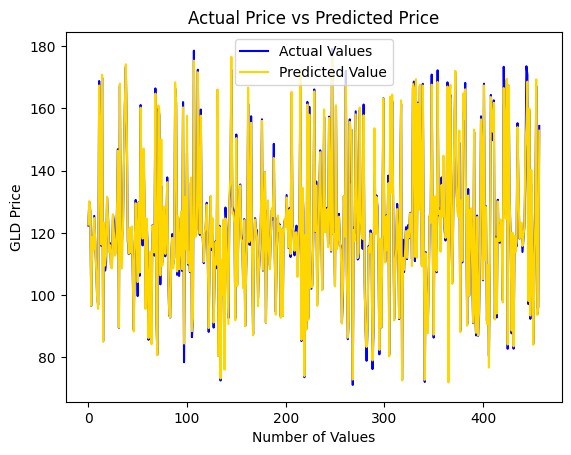

In [22]:
plt.plot(y_test, color="blue", label="Actual Values")
plt.plot(test_data_predict, color="gold", label="Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()